## 자연어
: 대화형 인공지능의 보편화, 사람의 언어를 이해하고 출력할 수 있는 기능을 위해 자연어 처리(Natural Language Processing, NLP)가 필요!
- 자연어 : 평소에 사용하는 음성이나 텍스트를 의미
- 언어의 규칙은 컴퓨터의 규칙과 달리 쉽게 해결되지 않는 여러 문제를 가지고 있었는데 딥러닝이 등장하면서 자연어 처리 연구가 활발해지기 시작 ==> 대용량 데이터를 학습할 수 있기 때문
- 컴퓨터는 수치화된 데이터만 이해할 수 있으므로 텍스트 그대로를 이해할 수 없다.
- ==> 따라서 텍스트를 정제하는 전처리 과정이 중요!

### 텍스트의 토큰화
- 텍스트를 컴퓨터 이해할 수 있는 데이터로 만들기 위해 제일 먼저 해야하는 일은 텍스트를 잘게 나누는 것
- 단어별, 문장별, 형태소별로 작게 나눠진 하나의 단위를 **토큰 (token)**이라고 한다.
- 그리고 텍스트를 이렇게 잘게 나누는 과정을 **토큰화 (tokenization)**라고 한다.
> '해보지 않으면 해낼 수 없다' ==> '해보지', '않으면', '해낼', '수', '없다'

- 텍스트를 토큰화 하고 나면 이를 이용해 여러 가지를 할 수 있다.
- 예 : 각 단어가 몇 번 중복되어 사용됐는지 ==> 단어의 빈도수로 텍스트에서 중요한 역할을 하는 단어를 파악할 수 있다.
##### Bag-of-Words(BoW)
- '단어의 가방' : 같은 단어끼리 따로따로 가방에 담은 후 각 가방에 몇 개의 단어가 들어 있는지 세는 기법


In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = '해보지 않으면 해낼 수 없다'
# 텍스트를 토큰화
result = text_to_word_sequence(text)
print('\n원본 :\n', text)
print('\n토큰화 :\n', result)


원본 :
 해보지 않으면 해낼 수 없다

토큰화 :
 ['해보지', '않으면', '해낼', '수', '없다']


In [2]:
# 단어 빈도 수 세기
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.', 
        '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
        '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.']

# 토큰화 함수를 이용한 전처리
token = Tokenizer()
token.fit_on_texts(docs)        # 토큰화 함수에 문장을 적용
print('\n단어 카운트 :\n', token.word_counts)
print('\n문장 카운트 :\n', token.document_count)
print('\n각 단어가 몇 개의 문장에 포함되어 있는가 :\n', token.word_docs)
print('\n각 단어에 매겨진 인덱스 값 :\n', token.word_index)


단어 카운트 :
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트 :
 3

각 단어가 몇 개의 문장에 포함되어 있는가 :
 defaultdict(<class 'int'>, {'토큰화': 1, '각': 1, '합니다': 1, '텍스트의': 2, '단어를': 1, '나누어': 1, '먼저': 1, '딥러닝에서': 2, '인식됩니다': 1, '토큰화해야': 1, '단어로': 1, '있습니다': 1, '수': 1, '사용할': 1, '결과는': 1, '토큰화한': 1})

각 단어에 매겨진 인덱스 값 :
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


### 단어의 원-핫 인코딩
- 단순히 단어의 출현 빈도만 가지고는 해당 단어가 문장의 어디에서 왔는지, 각 단어의 순서는 어떠했는지 등의 정보를 알 수 없다
- 단어가 문장의 다른 요소와 어떤 관계를 가지고 있는지 알아보는 방법이 필요! : 가장 기본적인 방법은 **원-핫 인코딩 (one-hot encoding)**
- 문장내 각 단어를 모두 0으로 바꾸고 원하는 단어만 1로 바꾸어 주는 것이 원-핫 인코딩

    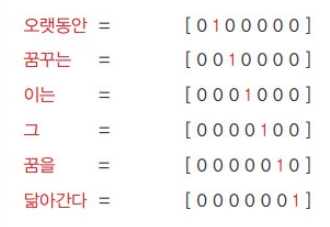


In [3]:
text = '오랫동안 꿈꾸는 이는 그 꿈을 닮아간다'
token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [4]:
x = token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [5]:
# 인덱스 수에 하나를 추가해서 원-핫 인코딩 배열 만들기
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes = word_size)
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


### 텍스트를 읽고 긍정, 부정 예측

In [6]:
# 텍스트 리뷰 자료를 지정
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]
# 긍정 리뷰는 1, 부정 리뷰는 0
classes = array([1,1,1,1,1,0,0,0,0,0])
# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [7]:
x = token.texts_to_sequences(docs)
print('\n리뷰 텍스트, 토큰화 결과 :\n', x)


리뷰 텍스트, 토큰화 결과 :
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


##### 패딩 (padding)
- : 토큰의 수를 똑같이 맞춰주는 작업
- GAN에서도 중요한 역할을 한다
- 원하는 길이보다 짧은 부분은 숫자 0을 넣어서 채워주고, 긴 데이터는 잘라서 같은 길이로 맞춘다.

In [8]:
# 패딩, 서로 다른 길이의 데이터를 4로 맞추어준다.
padded_x = pad_sequences(x,4)
print('\n패딩 결과 :\n', padded_x)


패딩 결과 :
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


### 단어 임베딩
- 원-핫 인코딩을 그대로 사용하면 벡터의 길이가 너무 길어진다는 단점이 있다
- 이러한 공간적 낭비를 해결하기 위해 **단어 임베딩 (word embedding)** 사용
- 단어 임베딩은 주어진 배열을 정해진 길이로 압축시킨다

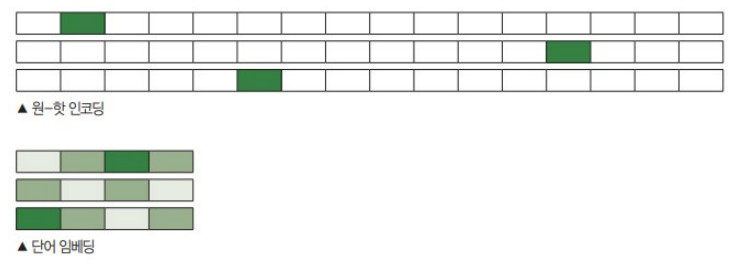

- 단어 임베딩으로 밀집된 정보를 가질 수 있다.
- 이러한 결과가 가능한 이유는 각 단어간의 유사도를 계산했기 때문

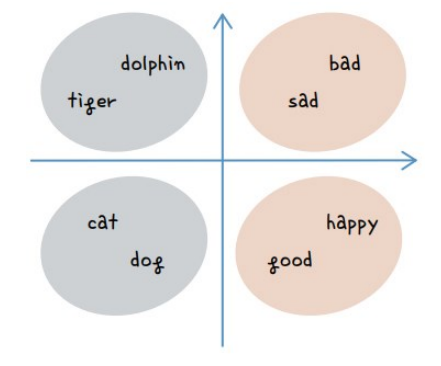

- 오차 역전파 : 적절한 크기로 배열을 바꾸어 주기 위해 최적의 유사도를 계산하는 학습과정을 거친다.
- ==> keras에서의 Embedding()함수로 간단히 해결
```
Embedding(16, 4, input_length = 2)
```
- Embeddin() 함수에 들어가는 인자: (1) 입력될 단어 수 - 예, 16, (2) 임베딩 후 출력될 벡터 크기 - 예, 4, (3) input_length - 총 입력되는 단어 수는 16이지만 매번 2개 씩만 넣는다.

In [9]:
# 임베딩에 입력될 단어의 수를 지정
# 전체 단어의 맨 앞에 0이 먼저 나와야 하므로 총 단어 수에 1을 더한다
word_size = len(token.word_index) + 1

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과 출력
model = Sequential()
model.add(Embedding(word_size, 8, input_length = 4))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              168       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 모델 실행
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(padded_x, classes, epochs = 20, verbose = 0)
print('\nAccuracy : %.4f' % (model.evaluate(padded_x, classes)[1]))

1/1 [==============================] - 0s 151ms/step - loss: 0.5656 - accuracy: 1.0000

Accuracy : 1.0000
